In [48]:
# Channel이 3인 이미지 데이터를 Convolution 연산하는 코드

import numpy as np
import tensorflow as tf

# 입력 데이터의 형태 : (이미지 개수, 이미지 height, 이미지 width, Channel) (1, 3, 3, 3)
image = np.array([[[[1, 2, 3],
                    [1, 2, 3],
                    [1, 2, 3]],
                   [[1, 2, 3],
                    [1, 2, 3],
                    [1, 2, 3]],
                   [[1, 2, 3],
                    [1, 2, 3],
                    [1, 2, 3]]]], dtype=np.float64)

# print(image.shape) # (1, 3, 3, 3)

# filter의 형태 : (filter height, filter width, filter channel, filter 개수) (2, 2, 3, 2)
weight = np.array([[[[1,2],
                   [1,2],
                   [1,2]],
                   [[1,2],
                   [1,2],
                   [1,2]]],
                   [[[1,2],
                   [1,2],
                   [1,2]],
                   [[1,2],
                   [1,2],
                   [1,2]]]], dtype=np.float64)

# print(weight.shape) # (2, 2, 3, 2)

conv2d = tf.nn.conv2d(image, weight,
                      strides=[1,1,1,1], # 위, 아래, 좌, 우
                      padding='VALID')
                   
sess = tf.Session()
result = sess.run(conv2d)
print(result)
print(result.shape)

[[[[24. 48.]
   [24. 48.]]

  [[24. 48.]
   [24. 48.]]]]
(1, 2, 2, 2)


In [4]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


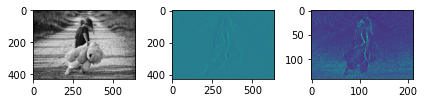

In [46]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

figure = plt.figure()

ax1 = figure.add_subplot(1,3,1)
ax2 = figure.add_subplot(1,3,2)
ax3 = figure.add_subplot(1,3,3)

ori_image = img.imread('./images/girl-teddy.jpg')
# print(type(ori_image)) # <class 'numpy.ndarray'>
# print(ori_image.shape) # (429, 640, 3) 흑백 이미지인데도 3차원? RGB 값이 다 똑같음

ax1.imshow(ori_image)

# 입력 데이터의 형태 : (이미지 개수, 이미지 height, 이미지 width, Channel) (1, 429, 640, 3)
# 이미지의 차원(3 -> 4)을 올려줘야!

input_image = ori_image.reshape((1,) + ori_image.shape) # 튜플로 차원 하나 더해주기
# print(input_image.shape)

input_image = input_image.astype(np.float32) # 데이터를 실수로 전환

# 이미지의 channel을 1로 변경
channel_1_input_image = input_image[:,:,:,0:1]
# print(channel_1_input_image.shape) # (1, 429, 640, 1)

# filter의 형태 : (filter height, filter width, filter channel, filter 개수) (3, 3, 1, 1)
weight = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])

# print(weight.shape) # (3, 3, 1, 1)

# stride = 1, padding='VALID'
conv2d = tf.nn.conv2d(channel_1_input_image, weight,
                      strides=[1,1,1,1], # 위, 아래, 좌, 우
                      padding='VALID')

sess = tf.Session()
result = sess.run(conv2d)
# print(result.shape) # (1, 427, 638, 1) (이미지 개수, feature map 세로, feature map 가로, filter 개수)

t_img = result[0,:,:,:]
# print(t_img.shape) # (427, 638, 1)

ax2.imshow(t_img)

# pooling 처리
pooling_result = tf.nn.max_pool(result,
                                ksize=[1,3,3,1], # 3 * 3 kernel
                                strides=[1,3,3,1], # kernel size와 동일하게 설정
                                padding='VALID')

pool_img = sess.run(pooling_result)
pool_img = pool_img[0,:,:,:]
# print(pool_img.shape) # (142, 212, 1)
ax3.imshow(pool_img)

plt.tight_layout()
plt.show()

In [41]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [42]:
# MNIST 예제를 이용해서 학습시킬 이미지들을 만들어 보자

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')
display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


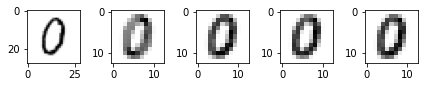

In [47]:
# subplot 생성
figure = plt.figure()

ax = list()

for i in range(5):
    ax.append(figure.add_subplot(1,5,i+1))

# 이미지 확인
img_data = df.drop('label', axis=1, inplace=False).values

ori_image = img_data[5:6].reshape(28,28) # 2차원 이미지 형태
ax[0].imshow(ori_image, cmap='Greys')

# 입력 데이터의 형태 : (이미지 개수, 이미지 height, 이미지 width, Channel) (1, 28, 28, 1)
input_image = ori_image.reshape((1,) + ori_image.shape + (1,)) # 2차원 이미지를 4차원으로
# print(input_image.shape)
input_image = input_image.astype(np.float32) # 데이터를 실수로 변환

# filter의 형태 : (filter height, filter width, filter channel, filter 개수) (3,3,1,4)
weight = np.random.rand(3,3,1,4)
# print(weight.shape)

conv2d = tf.nn.conv2d(input_image,
                     weight,
                     strides=[1,1,1,1],
                     padding='VALID')

sess = tf.Session()
conv2d_result = sess.run(conv2d)

# ReLU 처리
relu_ = tf.nn.relu(conv2d_result)
result_result = sess.run(relu_)

# pooling 처리
pool = tf.nn.max_pool(result_result,
                      ksize=[1,2,2,1], # 2 * 2 kernel
                      strides=[1,2,2,1],
                      padding='VALID')

pool_result = sess.run(pool)
# print(pool_result.shape) # (이미지 개수, feature map 세로, feature map 가로, filter 개수) (1, 13, 13, 4)

# 1과 4의 위치를 swap
i = np.swapaxes(pool_result,0,3)
# print(i.shape) # (4, 13, 13, 1)

for idx, image in enumerate(i):
    ax[idx+1].imshow(image.squeeze(), cmap='Greys') # squeeze는 numpy에서 차원이 1인 것을 제거
    
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

tf.reset_default_graph() # 그래프 리셋

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')

# Data Split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label', axis=1, inplace=False),
                df['label'],
                test_size=0.3,
                random_state=1,
                stratify=df['label'])

# x_data는 정규화 진행
scaler = MinMaxScaler()
scaler.fit(train_x_data)
norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

# t_data는 One-Hot Encoding 진행
sess = tf.Session()
onehot_train_t_data = sess.run(tf.one_hot(train_t_data, depth=10))
onehot_test_t_data = sess.run(tf.one_hot(test_t_data, depth=10))

# Tensorflow 구현

# placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)

# 입력 x_data의 shape를 변경
# (이미지 개수 - '-1', 이미지 height - '28', 이미지 width - '28', Channel - '1'). 행의 개수 알 수 없으므로 -1
x_img = tf.reshape(X, [-1,28,28,1])

# 첫번째 Convolution Layer

# filter의 형태 : (filter height, filter width, filter channel, filter 개수) 
W2 = tf.Variable(tf.random.normal([3,3,1,32])) # filter == Weight. 3 * 3 사이즈
L1 = tf.nn.conv2d(x_img, W2, strides=[1,1,1,1], padding='SAME')
L1 = tf.nn.relu(L1)
# (이미지 개수, feature map 세로, feature map 가로, filter 개수)
# print('L1의 Conv 결과 데이터 shape : {}'.format(L1.shape)) # (?, 28, 28, 32)

# 첫번째 Pooling
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
# print('L1의 Pooling 결과 데이터 shape : {}'.format(L1.shape)) # (?, 14, 14, 32)

# 두번째 Convolution Layer
W3 = tf.Variable(tf.random.normal([3,3,32,64]))
L2 = tf.nn.conv2d(L1, W3, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
# print('L2의 Conv 결과 데이터 shape : {}'.format(L2.shape)) # (?, 14, 14, 64)

# 두번째 Pooling
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
# print('L2의 Pooling 결과 데이터 shape : {}'.format(L2.shape)) # (?, 7, 7, 64)

# 결과 데이터를 DNN에 넣어서 학습
L2 = tf.reshape(L2, [-1, 7*7*64]) # 2차원으로 만들어주기

# Weight & bias
W4 = tf.get_variable('W4', shape=[7*7*64, 256], # hidden layer는 1개, node
                    initializer=tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.random.normal([256]))

_layer3 = tf.matmul(L2, W4) + b4
layer3 = tf.nn.relu(_layer3)
layer3 = tf.nn.dropout(layer3, rate=0.3)

# Out-put Layer
W5 = tf.get_variable('W5', shape=[256, 10],
                    initializer=tf.contrib.layers.variance_scaling_initializer())
b5 = tf.Variable(tf.random.normal([10]))

# Hypothesis, model
logit = tf.matmul(layer3, W5) + b5
H = tf.nn.softmax(logit)

# loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=T))

# Train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(loss)

# session 및 초기화
sess.run(tf.global_variables_initializer())

# 반복학습 (+ batch 처리)
for step in range(200):
    
    tmp, loss_val = sess.run([train, loss],
                            feed_dict={X:norm_train_x_data,
                                      T:onehot_train_t_data})
    if step % 20 == 0:
        print('loss value : {}'.format(loss_val))






The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



loss value : 32.441856384277344
loss value : 1.5695046186447144
loss value : 1.1291732788085938
